In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd

Using TensorFlow backend.


In [2]:
np.random.seed(777)

In [3]:
df=pd.read_csv('d_final_mehico.csv')
# df.head()
len(df)

121395

In [4]:
# 생존자 제거
freq = df['DEATH'].value_counts()
print(freq)

0    88993
1    32402
Name: DEATH, dtype: int64


In [5]:
survive = df[df['DEATH']==0].index
df1 = df.drop(survive)

In [6]:
# featrues; x
features= df1.loc[:, ['sex', 'intubed','pneumonia','age_grp','pregnancy', 'diabetes', 
                 'copd', 'asthma','inmsupr','hypertension','other_disease',
                 'cardiovascular','obesity', 'renal_chronic', 'tobacco', 
                 'contact_other_covid', 'covid_res', 'icu']]

# label; y 
label = df1.loc[:, ['diff_days']] # regression

In [7]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
feature_n = MinMaxScaler(feature_range=(0,1)).fit_transform(features)
feature_n

array([[0. , 0.5, 1. , ..., 1. , 0. , 0.5],
       [1. , 0.5, 0. , ..., 1. , 0. , 0. ],
       [1. , 0.5, 0. , ..., 1. , 0. , 0.5],
       ...,
       [1. , 0.5, 1. , ..., 1. , 1. , 0.5],
       [0. , 0. , 0. , ..., 0. , 1. , 0.5],
       [1. , 0. , 0. , ..., 0.5, 1. , 0. ]])

In [21]:
# Train, Test dataset 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, shuffle = True, test_size=0.2, random_state=1004)

In [22]:
print(x_train.shape[:], y_train.shape[:], x_test.shape[:], y_test.shape[:])

(25921, 18) (25921, 1) (6481, 18) (6481, 1)


In [23]:
# Regression part
# y변수: diff_days

# RMSE 구하기
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

C:\Users\Min\.conda\envs\my_python\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor()

In [24]:
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x_test)
#y_pred= model.predict(x_train)
y_true=y_test

rmse_1 = np.sqrt(mean_squared_error(y_true, y_pred))
mse_1 = mean_squared_error(y_true, y_pred)
print('MSE:', mse_1,'RMSE:',rmse_1)
# MSE: 57.329705992898134 RMSE: 7.571638263473641

MSE: 57.329705992898134 RMSE: 7.571638263473641


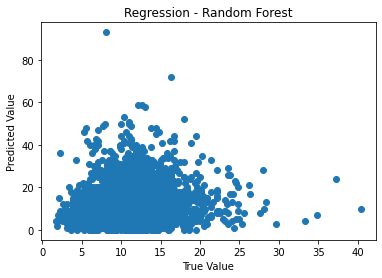

In [25]:
# 그래프
# x축: y_true, y축: y_predicted
plt.plot(y_pred, y_true, 'o')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Regression - Random Forest')
plt.show()

In [26]:
y_test2 = y_test.loc[:, "diff_days"] # True 값

In [27]:
# y와 y_predicted export
d_trueY = pd.DataFrame({'Y_True': y_test2}).reset_index(drop=True)
d_predY = pd.DataFrame({'Y_pred': y_pred})

In [28]:
reg_rdm_frst=pd.concat([d_trueY, d_predY], axis=1).reset_index(drop=True)
reg_rdm_frst

,Y_True,Y_pred
0,8,5.228889
1,14,10.229716
2,7,11.762610
3,15,8.097609
4,16,13.901149
...,...,...
6476,11,11.140012
6477,17,8.875021
6478,16,11.228751
6479,15,10.517789


In [29]:
reg_rdm_frst.to_csv('reg_randomforest.csv', encoding='utf-8', index=False, line_terminator='\n')